<a href="https://colab.research.google.com/github/vikpy/MLASem3/blob/master/MLA_Test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Consider the following data sample related to red wine and its associated characteristics.  The quality of the wine can be dependent upon many factors, some of which are shown in this data set.  The data set is provided to you separately in a csv file called “winequality-red” 


In [1]:
!pip install pyforest 
from pyforest import * 

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=b44c456143640956f70a7fc9898f0a417866c50d440fb14a93be8a7f40a396ad
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [4]:
 df = pd.read_csv("/content/winequality-red.csv")
 df.head()

<IPython.core.display.Javascript object>

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
print("Mean")
df.mean()

Mean


fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [10]:
print("Median")
df.median()

Median


fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [12]:
print("Mode")
df.mode().T

Mode


,0
fixed acidity,7.2000
volatile acidity,0.6000
citric acid,0.0000
residual sugar,2.0000
chlorides,0.0800
free sulfur dioxide,6.0000
total sulfur dioxide,28.0000
density,0.9972
pH,3.3000
sulphates,0.6000


In [14]:
print("Standard Deviation")
df.std().T

Standard Deviation


fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [16]:
# Randomizing the dataset
df1 = df.sample(frac=1).reset_index(drop=True)
train_size =  int(df1.shape[0]*0.8)
train = df1.iloc[:train_size, :]
test = df1.iloc[train_size:, :]

In [17]:
train["quality"].mean(), train["quality"].std()

(5.632525410476935, 0.8055397703012018)

In [18]:
test["quality"].mean(), test["quality"].std()

(5.65, 0.8167524958629975)

f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

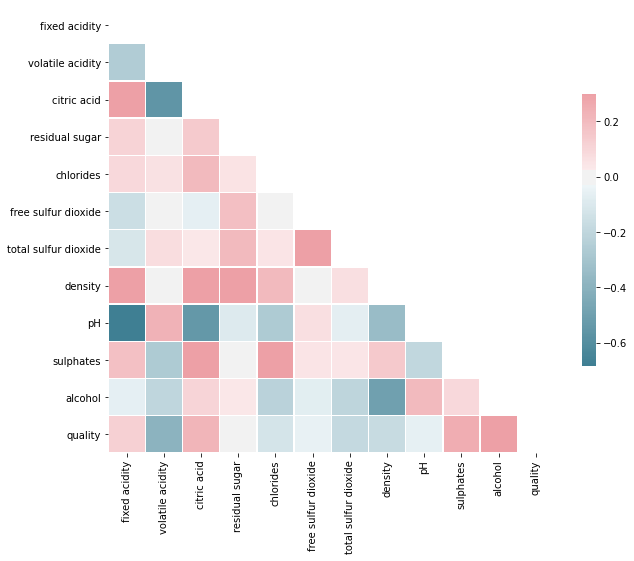

In [20]:
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## running regression models 

In [21]:
X_train, y_train = train.drop("quality", axis=1), train["quality"]
X_test, y_test = test.drop("quality", axis=1), test["quality"]

In [22]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
from sklearn import metrics

In [28]:
print("Train MAE: ")
print(metrics.mean_absolute_error(lr.predict(X_train), y_train))
print("Test MAE: ")
print(metrics.mean_absolute_error(lr.predict(X_test), y_test))

Train MAE: 
0.5017945388363844
Test MAE: 
0.4974283159184532


In [29]:
from sklearn.linear_model import Lasso

ls = Lasso()

ls.fit(X_train, y_train)



Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
print("Train MAE: ")
print(metrics.mean_absolute_error(ls.predict(X_train), y_train))
print("Test MAE: ")
print(metrics.mean_absolute_error(ls.predict(X_test), y_test))

Train MAE: 
0.6534236359354301
Test MAE: 
0.668147156295689


In [33]:
from sklearn.linear_model import Ridge

rd = Ridge()

rd.fit(X_train, y_train)


print("Train MAE: ")
print(metrics.mean_absolute_error(rd.predict(X_train), y_train))
print("Test MAE: ")
print(metrics.mean_absolute_error(rd.predict(X_test), y_test))


Train MAE: 
0.5025135755684451
Test MAE: 
0.4959768449343236


In [43]:
print("Predicted values for Ridge Regression")
pd.DataFrame( { "Predicted" : rd.predict(X_test), "Actual" : y_test } ).head(10)

Predicted values for Ridge Regression


<IPython.core.display.Javascript object>

,Predicted,Actual
1279,5.824126,6
1280,5.437553,6
1281,5.219393,6
1282,5.473920,5
1283,5.384448,5
1284,5.477680,5
1285,6.047348,6
1286,5.021936,5
1287,6.378329,6
1288,6.302734,6


In [42]:
print("Predicted values for Lasso Regression")
pd.DataFrame( { "Predicted" : ls.predict(X_test), "Actual" : y_test } ).head(10)

Predicted values for Lasso Regression


<IPython.core.display.Javascript object>

,Predicted,Actual
1279,5.648477,6
1280,5.747991,6
1281,5.684018,6
1282,5.655585,5
1283,5.403246,5
1284,5.744437,5
1285,5.673356,6
1286,5.538301,5
1287,5.701788,6
1288,5.691126,6


In [44]:
print("Predicted values for Linear Regression")
pd.DataFrame( { "Predicted" : lr.predict(X_test), "Actual" : y_test } ).head(10)

Predicted values for Linear Regression


<IPython.core.display.Javascript object>

,Predicted,Actual
1279,5.854421,6
1280,5.440396,6
1281,5.075286,6
1282,5.478441,5
1283,5.405439,5
1284,5.483938,5
1285,6.065433,6
1286,5.022791,5
1287,6.383819,6
1288,6.315073,6
